# *Merged Jupyter Notebook*

<hr><font color="green"><h1>from file: 05-Matplotlib\3\Activities\01-Ins_Summary_Statistics\Solved\samples</h1></font>

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [2]:
# Read in the LAX temperature data
temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

In [3]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(temperatures)
print(f"The mean temperature at the LAX airport is {mean_numpy}")

median_numpy = np.median(temperatures)
print(f"The median temperature at the LAX airport is {median_numpy}")

mode_scipy = sts.mode(temperatures)
print(f"The mode temperature at the LAX airport is {mode_scipy}")

The mean temperature at the LAX airport is 57.65514310002834
The median temperature at the LAX airport is 57.0
The mode temperature at the LAX airport is ModeResult(mode=array([57], dtype=int64), count=array([327]))


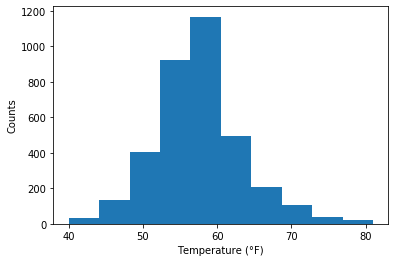

NormaltestResult(statistic=2.5529217560314548, pvalue=0.2790230516937098)


In [4]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(temperatures)
plt.xlabel('Temperature (Â°F)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(temperatures.sample(50)))

In [5]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(temperatures,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(temperatures,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 32.33077618382964
The population standard deviation using the NumPy module is 5.686015844493369


In [6]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between 51.969 and 63.341
Roughly 95% of the data is between 46.283 and 69.027
Roughly 99.7% of the data is between 40.597 and 74.713


In [ ]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = sts.zscore(temperatures)
print(f"The z-scores using the SciPy module are {z_scipy}")

<hr><font color="green"><h1>from file: 05-Matplotlib\3\Activities\02-Ins_Quartiles_and_Outliers\Solved\samples</h1></font>

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

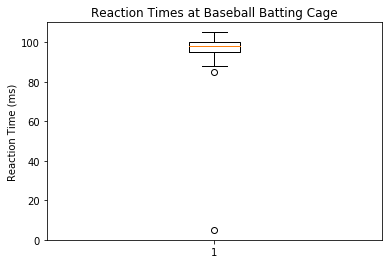

In [6]:
# Example outlier plot of reaction times
times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(times)
plt.show()

In [7]:
# We need to sort the data to determine which could be outliers
times.sort()
print(times)

[5, 85, 88, 95, 96, 97, 98, 98, 100, 100, 101, 102, 105]


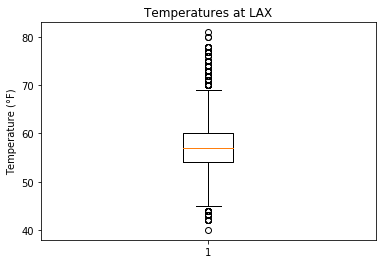

In [8]:
# The second example again looks at the LAX temperature data set and computes quantiles
temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (Â°F)')
ax1.boxplot(temperatures)
plt.show()

In [9]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 54.0
The upper quartile of temperatures is: 60.0
The interquartile range of temperatures is: 6.0
The the median of temperatures is: 57.0 
Values below 45.0 could be outliers.
Values above 69.0 could be outliers.


<hr><font color="green"><h1>from file: 05-Matplotlib\3\Activities\04-Ins_Standard_Error\Solved\standard_error</h1></font>

In [1]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

In [2]:
# Sample versus population example fuel economy
fuel_economy = pd.read_csv('../Resources/2019_fuel_economy.csv')

# First overview the data set - how many factors, etc.
print(fuel_economy.head())

          Type  Combined_MPG                           Make_Model
0  Two Seaters       21.0000                            Acura_NSX
1  Two Seaters       27.9406                        ALFA ROMEO_4C
2  Two Seaters       20.9455  Aston Martin Lagonda Ltd_Vantage V8
3  Two Seaters       25.9952             Audi_TT Roadster quattro
4  Two Seaters       27.6300                     BMW_Z4 sDrive30i


The mean MPG of all vehicles is: 23.33
The standard deviation of all vehicle's MPG is: 5.94


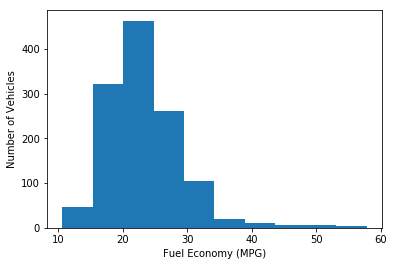

In [3]:
# Calculate the summary statistics and plot the histogram of the entire population data
print(f"The mean MPG of all vehicles is: {round(fuel_economy.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(fuel_economy.Combined_MPG.std(),2)}")
plt.hist(fuel_economy.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 18.48
The standard deviation of all vehicle's MPG is: 2.41


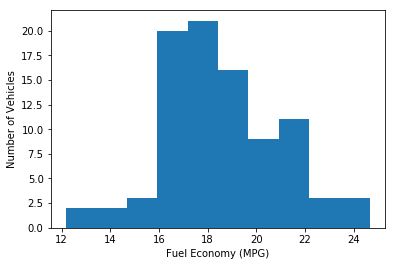

In [4]:
# Calculate the summary statistics and plot the histogram of the sample data using iloc
subset = fuel_economy.iloc[range(766,856)]
print(f"The mean MPG of all vehicles is: {round(subset.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset.Combined_MPG.std(),2)}")
plt.hist(subset.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 23.16
The standard deviation of all vehicle's MPG is: 5.67


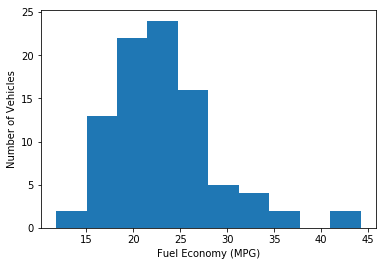

In [5]:
# Calculate the summary statistics and plot the histogram of the sample data using random sampling
subset = fuel_economy.sample(90)
print(f"The mean MPG of all vehicles is: {round(subset.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset.Combined_MPG.std(),2)}")
plt.hist(subset.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

In [6]:
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_economy.sample(30)
print(f"The SEM value for the sample fuel economy data is {sem(sample.Combined_MPG)}")

The SEM value for the sample fuel economy data is 1.5060987411235005


In [7]:
# Create a sample set of 10, each with 30 vehicles
vehicle_sample_set = [fuel_economy.sample(30) for x in range(0,10)]

In [8]:
# Generate the plot data for each sample 
means = [sample.Combined_MPG.mean() for sample in vehicle_sample_set]
standard_errors = [sem(sample.Combined_MPG) for sample in vehicle_sample_set]
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

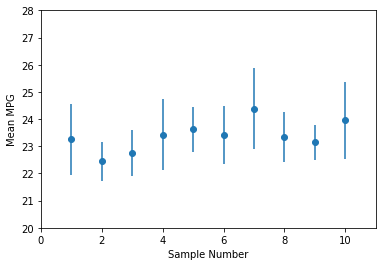

In [9]:
# Setting up the plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(vehicle_sample_set) + 1)
ax.set_ylim(20,28)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean MPG")
plt.show()

<hr><font color="green"><h1>from file: 05-Matplotlib\3\Activities\06-Ins_Correlation_Conundrum\Solved\correlation</h1></font>

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Import the WHO dataset, drop missing data
who_data = pd.read_csv('../Resources/WHO_data.csv')
who_data = who_data.dropna()
who_data.head()

,Country,Income_Per_Capita,Population (in thousands) total,Population_Median_Age,Percent_Population_over_60,Percent_Goverment_Expenditure_on_Health,Female_Life_Expectancy,Male_Life_Expectancy,Liters_of_Alcohol (Avg. Per year per person),Percent_Population_Access_To_Clean_Water,Cell_phones_per_100_people,Cell_phones_total,Measles_immunization
1,Albania,6000.0,3172.0,29.0,13.0,11.3,63.0,59.0,2.01,97.0,48.9,1100000.0,97.0
2,Algeria,5940.0,33351.0,24.0,7.0,9.5,62.0,60.0,0.15,85.0,41.5,4682690.0,83.0
4,Angola,3890.0,16557.0,17.0,4.0,5.0,35.0,32.0,3.86,51.0,10.3,940000.0,45.0
6,Argentina,11670.0,39134.0,29.0,14.0,14.2,68.0,62.0,8.40,96.0,57.4,13500000.0,99.0
7,Armenia,4950.0,3010.0,32.0,14.0,9.7,63.0,59.0,1.48,98.0,10.5,203309.0,94.0


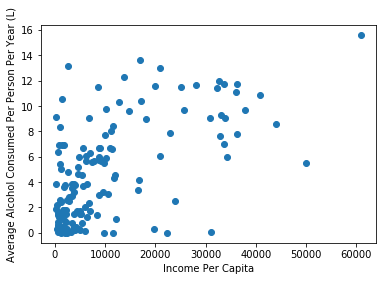

In [3]:
# For the first example, determine which pairs of factors are correlated. 
plt.scatter(who_data.iloc[:,1],who_data.iloc[:,8])
plt.xlabel('Income Per Capita')
plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
plt.show()

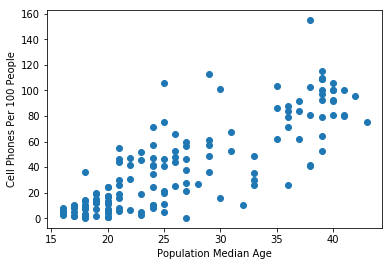

In [4]:
plt.scatter(who_data.iloc[:,3],who_data.iloc[:,10])
plt.xlabel('Population Median Age')
plt.ylabel('Cell Phones Per 100 People')
plt.show()

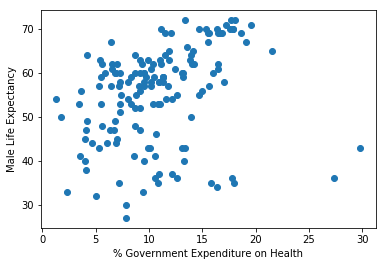

In [5]:
plt.scatter(who_data.iloc[:,5],who_data.iloc[:,7])
plt.xlabel('% Government Expenditure on Health')
plt.ylabel('Male Life Expectancy')
plt.show()

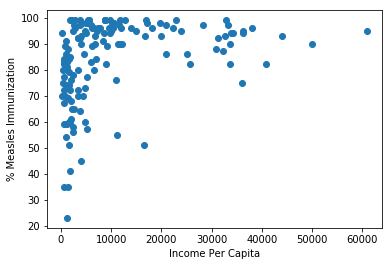

In [6]:
plt.scatter(who_data.iloc[:,1],who_data.iloc[:,12])
plt.xlabel('Income Per Capita')
plt.ylabel('% Measles Immunization')
plt.show()

In [7]:
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
income = who_data.iloc[:,1]
alcohol = who_data.iloc[:,8]
correlation = st.pearsonr(income,alcohol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.61


The correlation between both factors is 0.61


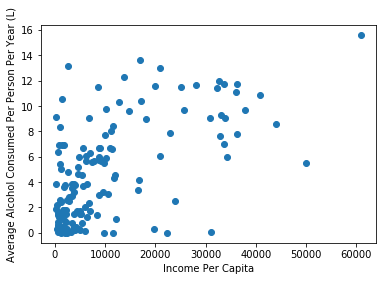

In [8]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(income,alcohol)
plt.xlabel('Income Per Capita')
plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.82


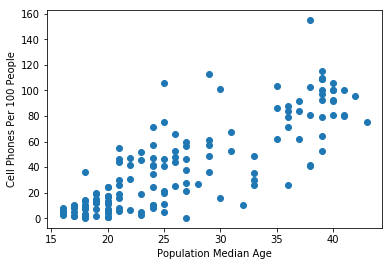

In [9]:
age = who_data.iloc[:,3]
cell_phones = who_data.iloc[:,10]
correlation = st.pearsonr(age,cell_phones)
plt.scatter(age,cell_phones)
plt.xlabel('Population Median Age')
plt.ylabel('Cell Phones Per 100 People')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.28


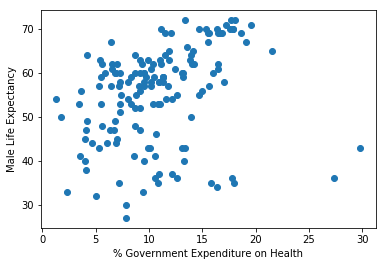

In [10]:
government = who_data.iloc[:,5]
life = who_data.iloc[:,7]
correlation = st.pearsonr(government,life)
plt.scatter(government,life)
plt.xlabel('% Government Expenditure on Health')
plt.ylabel('Male Life Expectancy')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.34


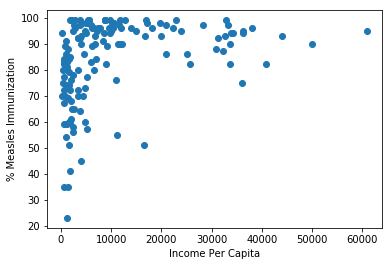

In [11]:
income = who_data.iloc[:,1]
measles = who_data.iloc[:,12]
correlation = st.pearsonr(income,measles)
plt.scatter(income,measles)
plt.xlabel('Income Per Capita')
plt.ylabel('% Measles Immunization')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

<hr><font color="green"><h1>from file: 05-Matplotlib\3\Activities\08-Ins_Fits_and_Regression\Solved\regression</h1></font>

In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
# This example compares different factors in the Boston housing data set
boston_data = datasets.load_boston()
housing_data = pd.DataFrame(data=boston_data.data,columns=boston_data.feature_names)
housing_data['MEDV'] = boston_data.target

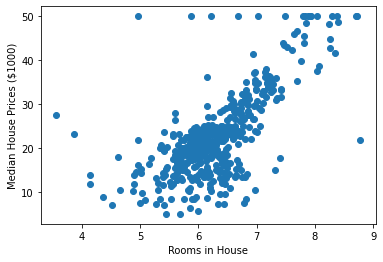

In [3]:
# Plot out rooms versus median house price
x_values = housing_data['RM']
y_values = housing_data['MEDV']
plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

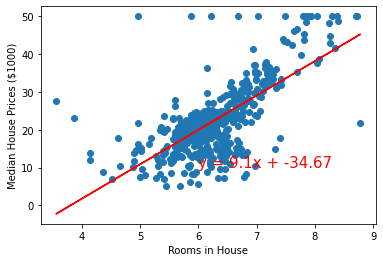

In [4]:
# Add the linear regression equation and line to plot
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

The r-squared is: 0.48352545599133356


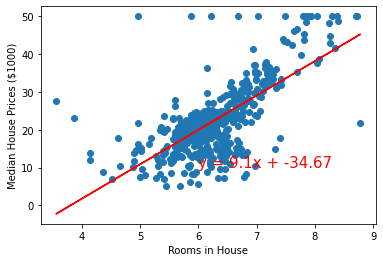

In [5]:
# Print out the r-squared value along with the plot.
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [6]:
# The next example looks at a diabetes data set with less linear relationships
diabetes_data = datasets.load_diabetes()
data = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)
data['1Y_Disease_Progress'] = diabetes_data.target

The r-squared is: 0.19490798886682942


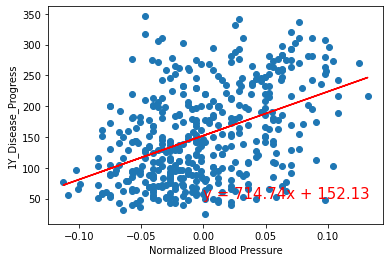

In [7]:
x_values = data['bp']
y_values = data['1Y_Disease_Progress']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Normalized Blood Pressure')
plt.ylabel('1Y_Disease_Progress')
print(f"The r-squared is: {rvalue**2}")
plt.show()